<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/dh307_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_sit%20(1).csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


    Time  pleth_1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  0.000    66165         NaN         NaN         NaN         NaN         NaN   
1  0.002    66160         NaN         NaN         NaN         NaN         NaN   
2  0.004    66149         NaN         NaN         NaN         NaN         NaN   
3  0.006    66153         NaN         NaN         NaN         NaN         NaN   
4  0.008    66153         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  \
0         NaN         NaN         NaN          NaN          NaN          NaN   
1         NaN         NaN         NaN          NaN          NaN          NaN   
2         NaN         NaN         NaN          NaN          NaN          NaN   
3         NaN         NaN         NaN          NaN          NaN          NaN   
4         NaN         NaN         NaN          NaN          NaN          NaN   

   Unnamed: 13  Unnamed: 14  Unn

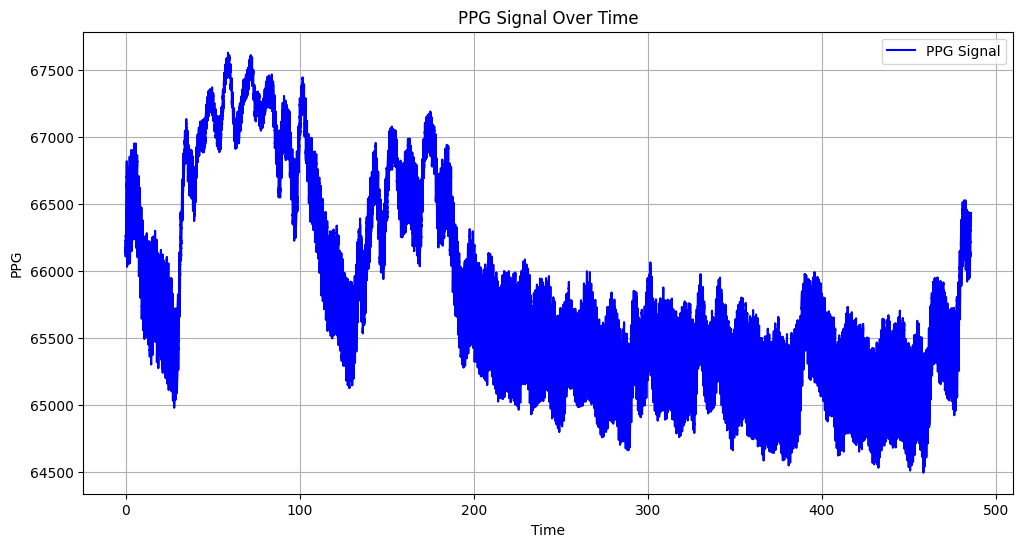

In [40]:
# Adjust these column names based on your dataset
time_column = 'Time'  # Replace with the actual name of the time column
ppg_column = 'pleth_1'    # Replace with the actual name of the PPG column

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df[time_column], df[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over Time')
plt.xlabel('Time')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


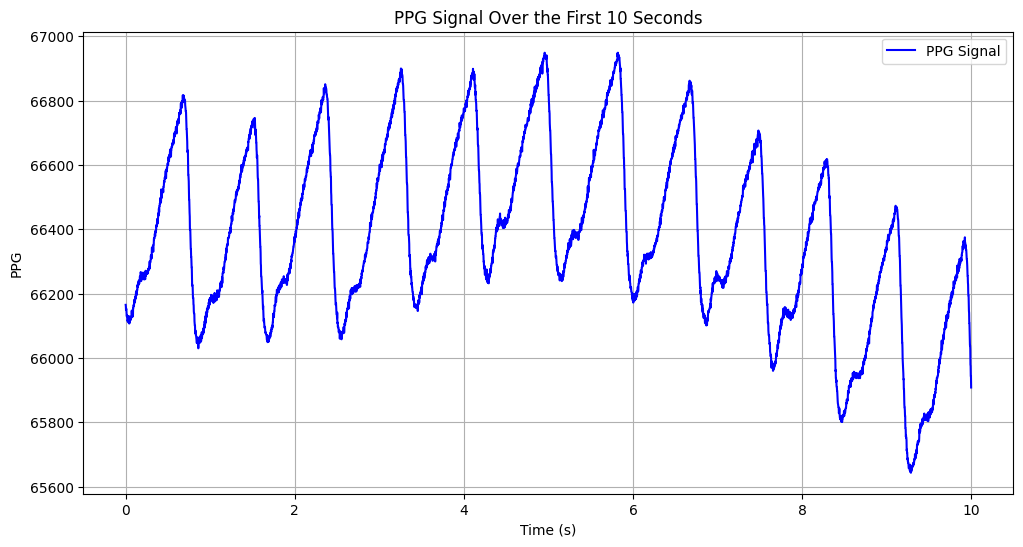

In [41]:
df_filtered = df[df[time_column] <= 10]
# Create a line plot for the first 10 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered[time_column], df_filtered[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over the First 10 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()

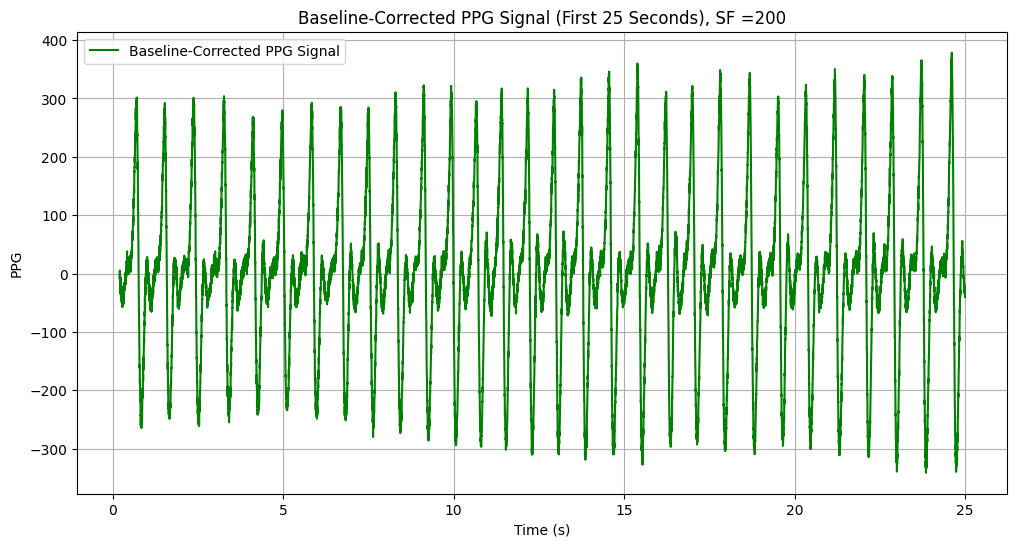

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time_column = 'Time'       # Replace with the actual name of the time column if different
ppg_column = 'pleth_1'     # Replace with the actual name of the PPG signal column if different

def moving_average(signal, smoothing_factor):
    return signal.rolling(window=smoothing_factor, center=True).mean()

# Apply the moving average filter to remove baseline drift
smoothing_factor = 200  # Adjust this value for more or less smoothing
df['Smoothed'] = moving_average(df[ppg_column], smoothing_factor)

# Subtract the smoothed signal from the original signal to get the baseline-corrected signal
df['Baseline_Corrected'] = df[ppg_column] - df['Smoothed']
df_filtered = df[df[time_column] <= 25]

# Plot the baseline-corrected signal for the first 25 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered[time_column], df_filtered['Baseline_Corrected'], label='Baseline-Corrected PPG Signal', color='green')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Baseline-Corrected PPG Signal (First 25 Seconds), SF =200')
plt.legend()
plt.grid()
plt.show()

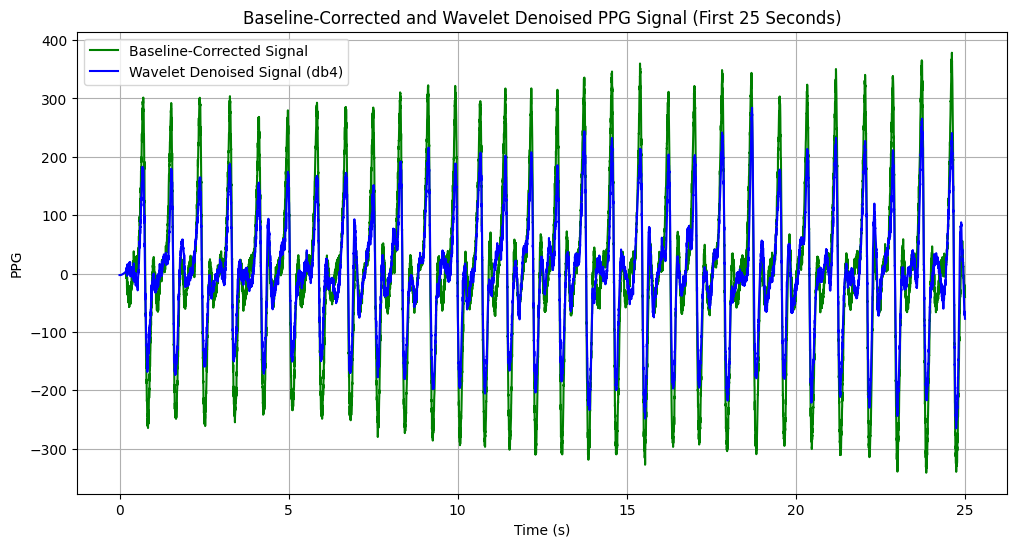

In [78]:
# Function to apply wavelet denoising
def wavelet_denoise(signal, wavelet='db4', level=1):
    coeffs = pywt.wavedec(signal, wavelet, mode='symmetric')
    # Set detail coefficients from level 1 upwards to zero for noise removal
    coeffs[1:] = [pywt.threshold(c, np.std(c) / 2, mode='soft') for c in coeffs[1:]]
    # Reconstruct the signal
    reconstructed_signal = pywt.waverec(coeffs, wavelet, mode='symmetric')

    # Match the length of the output to the input
    return reconstructed_signal[:len(signal)]

# Apply wavelet denoising on the baseline-corrected signal
df['Denoised_Signal'] = wavelet_denoise(df['Baseline_Corrected'].fillna(0))

# Filter the data to include only the first 25 seconds
df_filtered = df[df[time_column] <= 25]

# Plot the baseline-corrected and denoised signal for the first 25 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered[time_column], df_filtered['Baseline_Corrected'], label='Baseline-Corrected Signal', color='green')
plt.plot(df_filtered[time_column], df_filtered['Denoised_Signal'], label='Wavelet Denoised Signal (db4)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Baseline-Corrected and Wavelet Denoised PPG Signal (First 25 Seconds)')
plt.legend()
plt.grid()
plt.show()

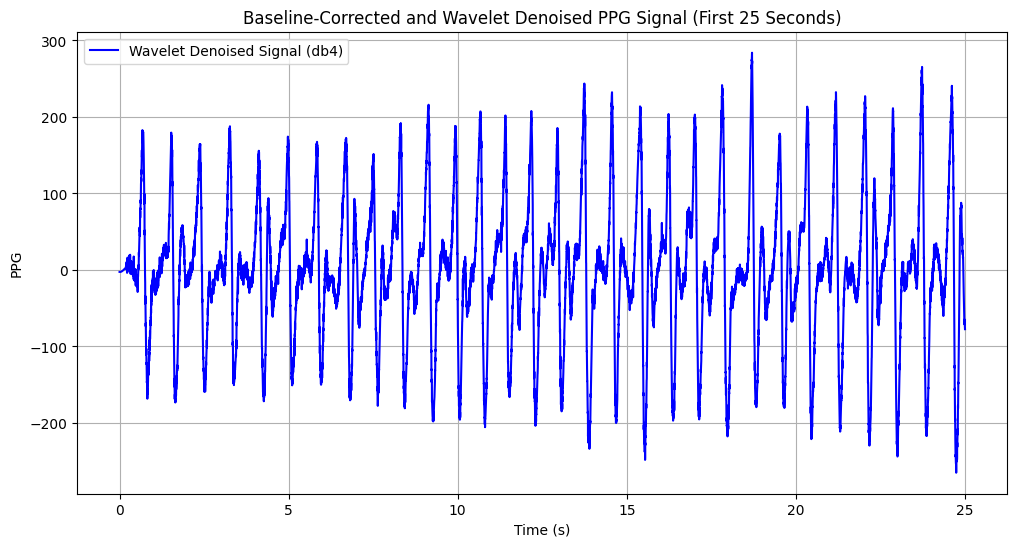

In [79]:


# Plot the baseline-corrected and denoised signal for the first 25 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered[time_column], df_filtered['Denoised_Signal'], label='Wavelet Denoised Signal (db4)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Baseline-Corrected and Wavelet Denoised PPG Signal (First 25 Seconds)')
plt.legend()
plt.grid()
plt.show()


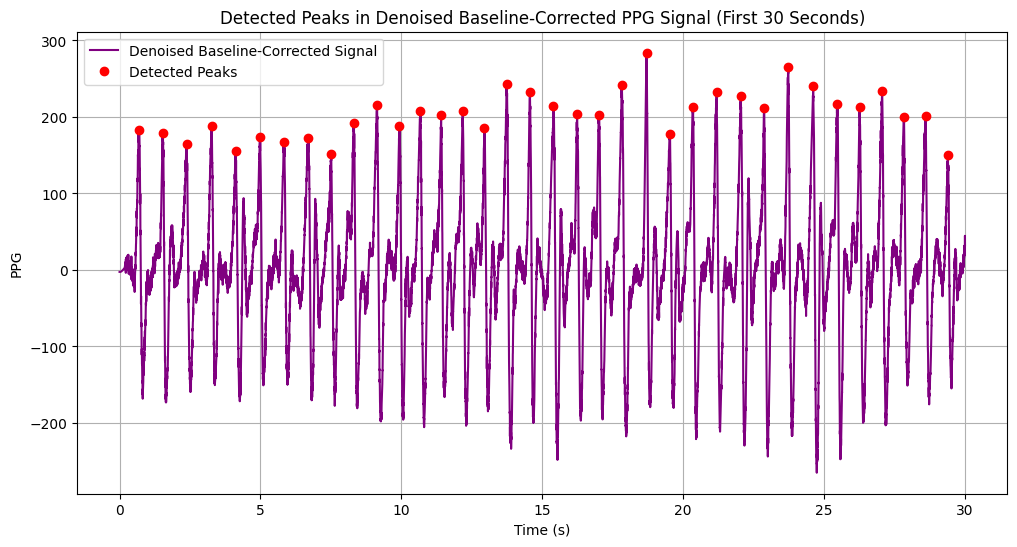

Number of detected peaks in the first 30 seconds: 36


In [85]:
# Parameters for peak detection
min_distance = 50  # Minimum distance between peaks, adjust based on data
min_height = 120  # Set this to a higher value to ignore smaller peaks
prominence = 30  # Set prominence to ensure only significant peaks are detected

# Detect peaks in the denoised, baseline-corrected signal with the new parameters
peaks, _ = find_peaks(df_filtered_30s['Denoised_Signal'], distance=min_distance, height=min_height, prominence=prominence)

# Plot the denoised, baseline-corrected signal with detected peaks for the first 30 seconds
plt.figure(figsize=(12, 6))
plt.plot(df_filtered_30s['Time'], df_filtered_30s['Denoised_Signal'], label='Denoised Baseline-Corrected Signal', color='purple')
plt.plot(df_filtered_30s['Time'].iloc[peaks], df_filtered_30s['Denoised_Signal'].iloc[peaks], 'ro', label='Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Detected Peaks in Denoised Baseline-Corrected PPG Signal (First 30 Seconds)')
plt.legend()
plt.grid()
plt.show()

# Display the number of detected peaks
print(f"Number of detected peaks in the first 30 seconds: {len(peaks)}")


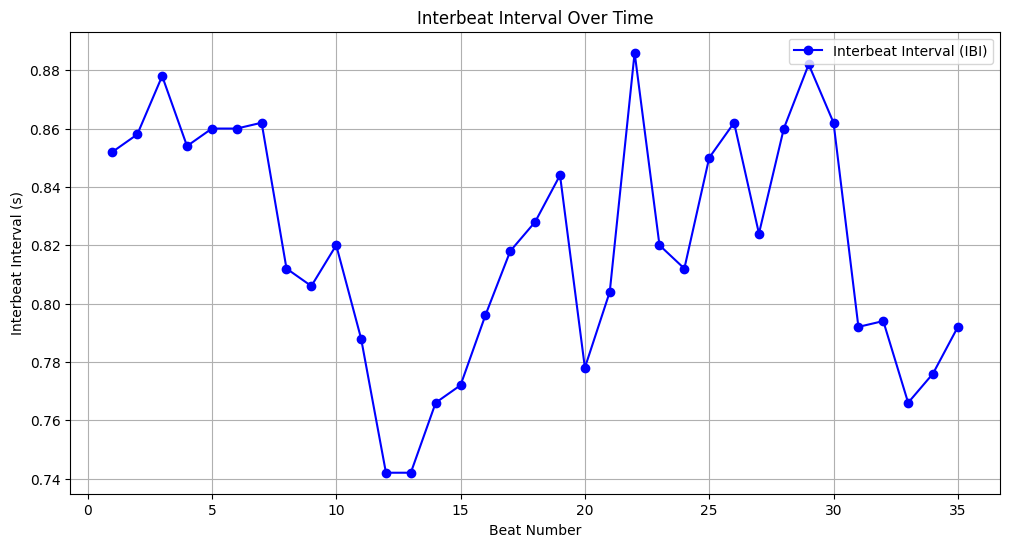

Average Interbeat Interval: 0.82 seconds
Estimated Heart Rate: 73.12 bpm


In [86]:
# Calculate Interbeat Intervals (IBI) from peak indices
def calculate_ibi(time, peak_indices):
    """
    Calculate the interbeat intervals (IBI) from the detected peak indices.

    Parameters:
        time (list or array): The time values corresponding to the PPG signal.
        peak_indices (list): Indices of the detected peaks in the PPG signal.

    Returns:
        list: Interbeat intervals in seconds.
    """
    ibi = []

    for i in range(1, len(peak_indices)):
        # Calculate the time difference between consecutive peaks
        interval = time[peak_indices[i]] - time[peak_indices[i - 1]]
        ibi.append(interval)

    return ibi

# Time values and detected peaks
time_values = df['Time'].values
ibi = calculate_ibi(time_values, peaks)

# Plotting the IBI
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(ibi) + 1), ibi, 'bo-', label='Interbeat Interval (IBI)')
plt.xlabel('Beat Number')
plt.ylabel('Interbeat Interval (s)')
plt.title('Interbeat Interval Over Time')
plt.legend()
plt.grid()
plt.show()

# Calculate and display the average IBI and heart rate
average_ibi = np.mean(ibi)
heart_rate = 60 / average_ibi  # Heart rate in beats per minute (bpm)
print(f"Average Interbeat Interval: {average_ibi:.2f} seconds")
print(f"Estimated Heart Rate: {heart_rate:.2f} bpm")

